In [2]:
import pandas as pd
import numpy as np

In [3]:
loc_lbl = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Labels"

In [4]:
loc_ftr = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Features\ftr_ins"

In [5]:
ins_lb = pd.read_csv( loc_lbl + "\\ins_lb.csv", dtype = {"obs_18_20":"bool", "obs_21_23":"bool", "obs_24_26":"bool"} )

### Filtro de manera que tenga los datos necesarios

In [121]:
rh_18_20 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_18_20.csv" ); rh_18_20 = rh_18_20["ref_hash"].drop_duplicates().tolist()
rh_21_23 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_21_23.csv" ); rh_21_23 = rh_21_23["ref_hash"].drop_duplicates().tolist()

In [122]:
dt_18_20 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash"] ] #Datos del (18-20)
sc_21_23 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["21_23_sc"] ] #SC del (21-23)

dt_21_23 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["ref_hash"] ] #Datos del (21-23)
sc_24_26 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["24_26_sc"] ] #SC del (24-26)

# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [211]:
Z = dt_21_23

### Agregamos los features 

In [212]:
ftr_01_Z = pd.read_csv( loc_ftr + "\\sin_hour_21_23.csv" ) 
ftr_02_Z = pd.read_csv( loc_ftr + "\\cant_ins_21_23.csv" )
ftr_03_Z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv" )
ftr_04_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" )
ftr_05_Z = pd.read_csv( loc_ftr + "\\cant_auc_21_23.csv" )
ftr_06_Z = pd.read_csv( loc_ftr + "\\wifi_ins_21_23.csv" )
ftr_07_Z = pd.read_csv( loc_ftr + "\\main_app_21_23.csv" )
ftr_08_Z = pd.read_csv( loc_ftr + "\\type_ins_21_23.csv" )
ftr_09_Z = pd.read_csv( loc_ftr + "\\ref_type_21_23.csv" )
ftr_10_Z = pd.read_csv( loc_ftr + "\\ip_encod_21_23.csv" )
ftr_11_Z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv" )
ftr_12_Z = pd.read_csv( loc_ftr + "\\kind_evt_21_23.csv" )

In [213]:
Z = Z.merge( ftr_01_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_02_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_03_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_04_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_05_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_06_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_07_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_08_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_09_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_10_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_11_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_12_Z, how = "inner", on = "ref_hash" )

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [214]:
Y = sc_21_23

In [215]:
X = dt_18_20

### Agregamos los features

In [216]:
ftr_01_X = pd.read_csv( loc_ftr + "\\sin_hour_18_20.csv" )
ftr_02_X = pd.read_csv( loc_ftr + "\\cant_ins_18_20.csv" )
ftr_03_X = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv" )
ftr_04_X = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv" )
ftr_05_X = pd.read_csv( loc_ftr + "\\cant_auc_18_20.csv" )
ftr_06_X = pd.read_csv( loc_ftr + "\\wifi_ins_18_20.csv" )
ftr_07_X = pd.read_csv( loc_ftr + "\\main_app_18_20.csv" )
ftr_08_X = pd.read_csv( loc_ftr + "\\type_ins_18_20.csv" )
ftr_09_X = pd.read_csv( loc_ftr + "\\ref_type_18_20.csv" )
ftr_10_X = pd.read_csv( loc_ftr + "\\ip_encod_18_20.csv" )
ftr_11_X = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv" )
ftr_12_X = pd.read_csv( loc_ftr + "\\kind_evt_18_20.csv" )

In [217]:
X = X.merge( ftr_01_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_02_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_03_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_04_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_05_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_06_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_07_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_08_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_09_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_10_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_11_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_12_X, how = "inner", on = "ref_hash" )

## Dropeamos los ref_hash (No estan codificados)

In [218]:
X = X.drop( "ref_hash", axis = 1 )
Z = Z.drop( "ref_hash", axis = 1 )

# Prediccion con <span style="color:green"> *XGBoost*</span> 

In [219]:
import xgboost as xgb
import graphviz as gr 

In [220]:
prm = {"objective" :'reg:linear', 
       "colsample_bytree" : 0.5, 
       "learning_rate" :0.1,
       "max_depth" : 2,
       "alpha" : 10, 
       "n_estimators" : 110 }

estimator = xgb.XGBRegressor( **prm )

In [221]:
pmt = estimator.fit( X,Y )

In [222]:
prd = estimator.predict( Z )

### Calculamos el RMSE

In [223]:
from sklearn.metrics import mean_squared_error

In [224]:
rmse = np.sqrt( mean_squared_error(sc_24_26, prd) )
print("RMSE: %f" % (rmse) )

RMSE: 25511.292327


In [226]:
record = 25511.292327

## Graficamos el Arbol

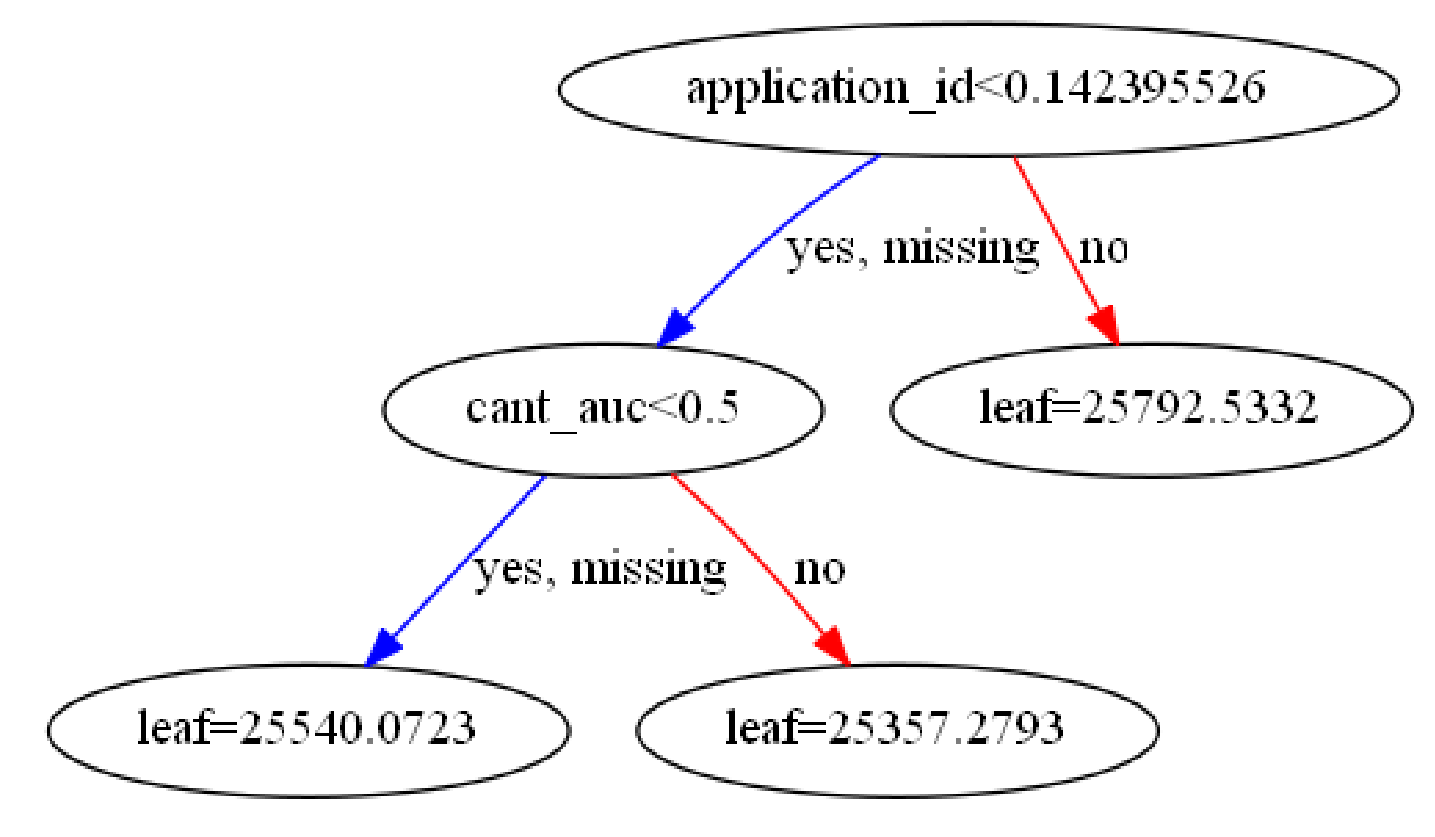

In [227]:
import matplotlib.pyplot as plt

import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dtrn = xgb.DMatrix(X,Y)

xg_reg = xgb.train(params = prm, dtrain = dtrn, num_boost_round=1)

xgb.plot_tree(xg_reg)
plt.rcParams['figure.figsize'] = [25, 15]
plt.show()